## Assigment 2


#### -Calculate and  visualize asset lifetime value given straight line depreciation method for latest Macbook. Assume cost of 1499 euro and 3 years asset lifetime. Describe other depreciation methods and their advantages/disadvantages for this specific asset type.
<br>
Depreciation methods refer to the necessity for businesses to determine the projected loss of value of certain assets over time. Straight-line depreciation is a very common and simple method of calculating the expense.

In order to calculate the Macbook lifetime value given "Straight Line" depreciation method, first we define the following formula:

$Depreciation$ $Expense$ $=$ $(Cost$ $–$ $Salvage$ $value)$ $/$ $Useful$ $life$

In Straight line approach an equal amount of depreciation is applied every year for the asset useful life. Is assume that the cost of the asset is 1499 euro and the useful life given in years is 3. Since we do not know the value of the salvage value we assume that it is equals 0.

We are going to write a Python code in order to calculate the Depreciation Expense of our asset.
<br>
<br>

In [1]:
def straight_line_depreciation(cost,salvage_value,useful_life):
    return (cost-salvage_value)/useful_life

cost = 1499
salvage_value = 0
years = 3
depreciation = round(straight_line_depreciation(cost,salvage_value,years),2)

print("Depreciation Expense = %s" % depreciation)

Depreciation Expense = 499.67


Now we proceed to visualize the asset lifetime given the Depreciation Expense. Lets start first with a data frame of our analysis output.
<br>

In [2]:
import pandas as pd

#creating the asset's values time line
time_line_values=[1499]
acumulated_depreciation=[0]
for _ in range(years):
    acumulated_depreciation.append(acumulated_depreciation[-1]+depreciation)
    
    if time_line_values[-1]-depreciation<0:
        time_line_values.append(0)
    else:
        time_line_values.append(time_line_values[-1]-depreciation)

data={"Years:":[i for i in range(years+1)],
      "MacBook Price:": time_line_values,
      "Acumulated Depreciation:":acumulated_depreciation,
      "Depreciation:":[depreciation for _ in range(years+1)]}
df=pd.DataFrame(data)
df

,Years:,MacBook Price:,Acumulated Depreciation:,Depreciation:
0,0,1499.00,0.00,499.67
1,1,999.33,499.67,499.67
2,2,499.66,999.34,499.67
3,3,0.00,1499.01,499.67


Making a graphic representation of our data:
<br>

In [3]:
from matplotlib import pyplot as plt
import numpy as np
    
#plotting the results
fig, axes = plt.subplots()
index=np.arange(years+1)
bar_width = 0.35
opacity = 0.4

rects1 = axes.bar(index,time_line_values, bar_width,alpha=opacity, color='b', label='Cost')

def adding_label(rects):
    """
    Displaying the value for each bar
    """
    for rect in rects:
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width()/2., height,
                '%s' % round(height,2),
                ha='center', va='bottom',color='b')
adding_label(rects1)

axes.set_xlabel('Years')
axes.set_ylabel('Cost')
axes.set_title('Asset Lifetime')
axes.set_xticks(index)
fig.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

There are other depreciation methods that we can use, for example:

### Double declinig balance

This method is a form to acellerated  depreciation. The depreciation is greater in the first few years and smaller in the later years of an asset’s useful life. The method reflects the fact that assets are more productive in its early years than in its later years. The formula to calculate it is:

-$Depreciation$ $Expense = (100\% $ $/$ $Useful$ $life$ $of$ $asset)$ $*$ $2$
<br>

In our problem would be:

Expense= $(100\%/ 3) * 2 = 66.67\%$

The initial expense would be $Expense_0$ = $1499 * 66.67\% = 999.38$, and our ending value $1499 - 999.38 = 499.62$.

For the next year $Expense_1$ = $499.62 * 66.67\% = 333.09$, and our ending value $499.62 - 333.09 = 166.52$.

#### Disadvantages

Based on the calculations, we are going to have a high value of depreciation just in the first year. Wich I think is not a good solution or approach for our problem, in order to analyse the real depreciation value of a Macbook. This method requires building an actual schedule and a much more detaild form of calculating depreciation. 

#### Advantages
It is an convenience way if we want to analysis the  investment of a company in IT Equipment having a bigger depreciation in expense the first years and lower in the later years. Other example is if a company wants to lower their taxes, having bigger expenses the first years, getting less income subject to taxes the first years. 


### Units of production
In this the depreciation expense varies each year, that is because the expense is based on the output that the assets produce. To calculate we apply this formula: 

-$Depreciation$ $Expense =$ $($$Number$ $of$ $units$ $produced$ $/$ $Life$ $in$ $number$ $of$ $units$$)$$*$ $($$Cost$ $-$ $Salvage$ $value)$

#### Advantages
This method is useful if we want to match the actual output of the business to the depreciation expense that it incurs. The expense is viewed in units, the depreciation expense is based on activity, we can call it units of activity. The formula is very similar to the straight line, but divided by the activity consumption. 

#### Disadvantages
In our problem we can not represent the activity, since is not defined. Maybe if we can figure it out how to express this activity in our problem, this approach could worth it. A an example similar to our problems is with cars, but in that case we can define an amount of miles in order to represent the activity for the unit that we measure its life in miles.


### Sum years of digits
This method is one of the accelerated depreciation methods. As we described before, higher expense is incurred in the early years while lower expense is incurred in the latter years of the asset.

$Depreciation$ $Expense$ $=$ $(Remaining$ $life$ $/$ $Sum$ $of$ $the$ $years$ $digits)$  $*$$(Cost$ $–$ $Salvage$ $value)$

In our case:

Defining the  $Depreciation$ $Base$ = $Cost$ – $Salvage$ $value$ (this value is constant throughout the process).

$Depreciation$ $Base$ = $1499 - 0 = 1499$

The remaining life ($RL$) is simply the remaining life of our asset. At the beginning of the process, the asset has a remaining life of 3 years. the Sum of the years ($SY$) would be $1+2+3=6$ years. Then, $RL$ $/$ $SY$ $= 3/6 = 0.5$.

$Depreciation$ $Expense_0$ $=$ $0.5 * 1499 = 749.5$

Let's write a Python code to calculate the complete process:

In [4]:
def sum_years_method(cost, salvage_value, years):
    depreciation_base = cost - salvage_value
    depreciation = [0]
    asset_values = [1499]
    acumulated_depreciation = [0]
    sy = sum([y for y in range(years + 1)])

    for y in range(years, 0, -1):
        current_depreciation = y / sy * depreciation_base
        acumulated_depreciation.append(round(acumulated_depreciation[-1] + current_depreciation,2))
        depreciation.append(round(current_depreciation,2))
        current_value = asset_values[-1] - current_depreciation
        if current_value > 0:
            asset_values.append(round(current_value,2))
        else:
            asset_values.append(0)

    return asset_values, depreciation, acumulated_depreciation, depreciation_base

cost = 1499
salvage_value = 0
years = 3

values, depreciation_expense, acumulated_depreciation, depreciation_base = sum_years_method(cost,
                                                                                            salvage_value,
                                                                                            years)

data = {"Years:": [i for i in range(years + 1)],
        "MacBook Price:": values,
        "Depreciations:": depreciation_expense,
        "Acumulated Depreciation:": acumulated_depreciation,
        "Depreciation Base:": [depreciation_base for _ in range(years + 1)]}
df = pd.DataFrame(data)
df

,Years:,MacBook Price:,Depreciations:,Acumulated Depreciation:,Depreciation Base:
0,0,1499.00,0.00,0.00,1499
1,1,749.50,749.50,749.50,1499
2,2,249.83,499.67,1249.17,1499
3,3,0.00,249.83,1499.00,1499


As we can see, the depreciation values decrease faster with this method compared to the straight line, but it fits the lifetime of our asset. The next graphic show us the difference of the outputs between $Straight$ $Line$ and $Sum$ $of$ $Year$ $Digits$.

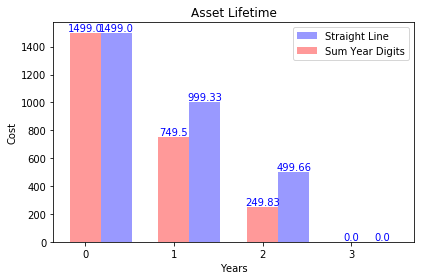

In [5]:
fig, axes = plt.subplots()

rects2 = axes.bar(index,values, bar_width,alpha=opacity, color='r', label='Cost')
rects1 = axes.bar(index+bar_width,time_line_values, bar_width,alpha=opacity, color='b', label='Cost')
adding_label(rects2)
adding_label(rects1)

axes.set_xlabel('Years')
axes.set_ylabel('Cost')
axes.set_title('Asset Lifetime')
axes.set_xticks(index)
axes.legend((rects1[0], rects2[0]), ('Straight Line', 'Sum Year Digits'))
fig.tight_layout()
plt.show()

#### Advantage
<br>
This method fits in the time life of the asset and it has a dynamic way to calculate the depreciation.

#### Disadvantage
The values of the depreciation decrease to fast in the first years and an asset like Macbooks, Computers should have a lower value of depreciation considering their cost.